In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.layers import Dense # Import Dense
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-10-11 06:11:44--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2025-10-11 06:11:44 (111 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], drop_first=False)

dataset.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False


In [4]:
x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values.astype('float64')
y = dataset[['expenses']].values.astype('float64')

train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42, train_size=0.8)

print("Final X type:", train_dataset.dtype)
print("Final Y type:", train_labels.dtype)

Final X type: float64
Final Y type: float64


In [5]:
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=100)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
34/34 - 3s - 98ms/step - loss: 13320.6221 - mean_absolute_error: 13320.6221 - mean_squared_error: 321723584.0000 - val_loss: 12925.9268 - val_mean_absolute_error: 12925.9268 - val_mean_squared_error: 322233536.0000
Epoch 2/100
34/34 - 0s - 5ms/step - loss: 13276.0322 - mean_absolute_error: 13276.0322 - mean_squared_error: 320464288.0000 - val_loss: 12857.3545 - val_mean_absolute_error: 12857.3545 - val_mean_squared_error: 320315968.0000
Epoch 3/100
34/34 - 0s - 9ms/step - loss: 13167.2783 - mean_absolute_error: 13167.2783 - mean_squared_error: 317471488.0000 - val_loss: 12695.2529 - val_mean_absolute_error: 12695.2529 - val_mean_squared_error: 315841504.0000
Epoch 4/100
34/34 - 0s - 10ms/step - loss: 12941.2783 - mean_absolute_error: 12941.2783 - mean_squared_error: 311154848.0000 - val_loss: 12390.9492 - val_mean_absolute_error: 12390.9492 - val_mean_squared_error: 307583616.0000
Epoch 5/100
34/34 - 0s - 4ms/step - loss: 12547.5723 - mean_absolute_error: 12547.5723 - mean_

9/9 - 0s - 11ms/step - loss: 5957.9463 - mean_absolute_error: 5957.9463 - mean_squared_error: 146169872.0000
Testing set Mean Abs Error: 5957.95 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


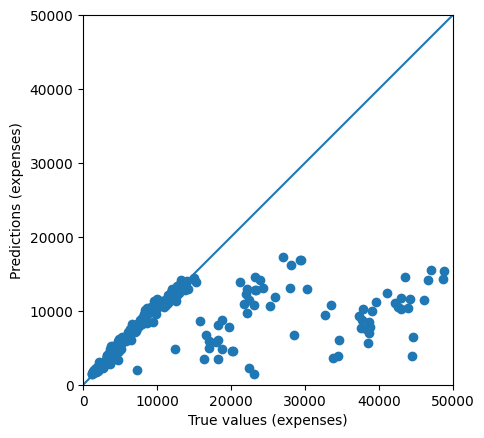

In [6]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
